In [64]:
#importing necessary packages
import psycopg2
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import networkx as nx
import graphviz as pgz

In [65]:
#connecting to epic database
epic = psycopg2.connect(dbname='epic', user='fkamunde', password='Gag9Chemist\Cubby', host='epidata.sruc.ac.uk', port='5432', sslmode='require')
curE = epic.cursor()

In [66]:
#function to read the tables
def create_pandas_table_epic(sql_query, database = epic):
    table = pd.read_sql_query(sql_query, database)
    return table

In [67]:
    #reading from scoteid201706.pig_movements
    pig_movements = create_pandas_table_epic('SELECT * FROM scoteid201706.pig_movements')
    pig_movements #pig movement table

,sams_movement_reference_pigs,foreign_reference,lot_no,lot_date,departure_date,arrival_date,qty_pigs,qty_doa,fci_declaration,dep_assurance_no,...,dest_address3,dest_address4,dest_postcode,destination_cph,individual_ids,id_type,batch_mark,read_location_cph,birth_cph,updated
0,4655639,None,1220,2020-03-16,None,2020-03-16,180,0.0,None,106,...,Brechin,None,DD9 7PL,67/084/8004,None,batch,LU,66/056/0039,,None
1,2330294,None,1615,2015-04-16,None,2015-04-16,71,0.0,None,266,...,Brechin,Angus,DD9 7PL,67/084/8004,None,batch,GASK,66/083/0167,66/083/0167,None
2,462063,None,2212,2012-05-28,None,2012-05-28,12,0.0,None,184,...,Inverurie,Aberdeenshire,AB51 5XZ,66/062/8001,None,batch,WK,66/065/0079,66/065/0079,None
3,410930,VION:45646,45646,2012-03-06,None,2012-03-06,22,0.0,None,822 / 28150020P1,...,Banff,Aberdeenshire,AB45 3TX,66/083/0074,"R28,200,284,491,506,198,402,545,384,990,286,36...",ids,None,70/226/8001,70/226/8001,None
4,398923,BPEX:1QQUSGMWSS0VYCRZCT1SJDJ,ab2,2012-02-16,None,None,8,NaN,None,SG5879,...,None,None,,47/681/0051,None,temp,"GREEN DOT MID""",77/368/0008,77/368/0008,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135477,5073384,None,0221,2021-01-11,None,2021-01-11,40,0.0,None,188,...,Brechin,None,DD9 7PL,67/084/8004,None,batch,WB88,66/058/0134,,None
135478,5082348,2RRVTHNXTS.CHZYUDJ0TXCLR,76363,2021-01-21,2021-01-21,2021-01-21,390,0.0,None,None,...,Oak Lane,Sykehouse,DN14 9AE,51/809/0093,None,temp,BLUE DOT,89/662/0060,,None
135479,5082363,None,0321,2021-01-21,None,None,0,NaN,None,368,...,Brechin,None,DD9 7PL,67/084/8004,None,batch,T10W,92/770/0084,,None
135480,5073425,None,0221,2021-01-12,None,2021-01-12,130,0.0,None,181,...,Ardrossan,Ayrshire,KA22 8DQ,69/216/8001,None,batch,OAC,97/848/0016,,None


In [68]:
pig_movements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135482 entries, 0 to 135481
Data columns (total 31 columns):
sams_movement_reference_pigs    135482 non-null int64
foreign_reference               36477 non-null object
lot_no                          135482 non-null object
lot_date                        135454 non-null object
departure_date                  24671 non-null object
arrival_date                    118279 non-null object
qty_pigs                        135482 non-null int64
qty_doa                         123734 non-null float64
fci_declaration                 0 non-null object
dep_assurance_no                82461 non-null object
dep_name                        135470 non-null object
dep_business                    135310 non-null object
dep_address2                    91484 non-null object
dep_address3                    130491 non-null object
dep_address4                    97332 non-null object
dep_postcode                    135482 non-null object
departure_cph       

In [69]:
#converting dates columns to type date
pig_movements['departure_date'] = pig_movements['departure_date'].astype('datetime64[ns]')
pig_movements['arrival_date'] = pig_movements['arrival_date'].astype('datetime64[ns]')

In [70]:
#pig movement from 2019 to 2020
pig_movements_2019_2020 = pig_movements.loc[pig_movements['departure_date'] > '2019-01-01']

In [71]:
#unique bussiness names involved in the movement from 2019-2020
column_values = pig_movements_2019_2020[["dep_business", "dest_business"]].values.ravel()
unique_values =  pd.unique(column_values)
len(unique_values)


738

In [72]:
#number of pigs transported
pig_movements['qty_pigs'].sum()

13965350

In [73]:
# unique postcodes
column_valuesn = pig_movements[["dep_postcode", "dest_postcode"]].values.ravel()
unique_valuesn =  pd.unique(column_valuesn)
len(unique_valuesn)

5737

In [74]:
#unique movement destination business names for 2019-2020
pig_movements_2019_2020['dest_business'].nunique()

528

In [75]:
#unique movement departure business names for 2019-2020
pig_movements_2019_2020['dep_business'].nunique()

343

In [76]:
#unique movement departure business names
pig_movements['dest_business'].nunique()

6610

In [77]:
#unique movement departure business names
pig_movements['dep_business'].nunique()

5995

In [78]:
x = pig_movements[pig_movements.arrival_date != '2026-03-29 00:00:00']

In [79]:

max(x['arrival_date'])

Timestamp('2021-02-04 00:00:00')

In [80]:
pig_movements['year'] = pd.DatetimeIndex(pig_movements['arrival_date']).year

In [81]:
#movements with quantity of pigs transported over 1000
pig_movements.loc[pig_movements['qty_pigs'] > 1000]

,sams_movement_reference_pigs,foreign_reference,lot_no,lot_date,departure_date,arrival_date,qty_pigs,qty_doa,fci_declaration,dep_assurance_no,...,dest_address4,dest_postcode,destination_cph,individual_ids,id_type,batch_mark,read_location_cph,birth_cph,updated,year
381,874155,BPEX:2RRVTHNXTS9JSDMSV2SSTFI,52008,2013-06-19,NaT,2014-06-19,1118,0.0,None,857 / 28150052P1,...,LEEDS,LS25 3AU,50/144/0022,None,temp,"BLUE DOT""",89/662/0058,89/662/0058,None,2014.0
563,839469,BPEX:2RRVTHNXTS9IRITZIA70QTF,52706,2013-08-29,NaT,NaT,1180,0.0,None,None,...,Leeds,LS25 3AU,50/144/0022,None,temp,"BLUE DOT""",92/782/0011,92/782/0011,None,NaN
737,762945,BPEX:2RRVTHNXTS9E6XYJP2K5I7G,ENHYZ,2013-04-29,2013-04-29,2013-04-30,1405,0.0,None,None,...,Leicestershire,LE14 2QT,22/296/0162,None,None,ZI020,98/860/8008,98/860/8008,None,2013.0
868,4623881,2RRVTHNXTS.C4NZ7BW6A17EU,72926,2020-02-20,2020-02-20,2020-02-20,1366,0.0,None,None,...,None,HU14 3JY,51/372/0006,None,temp,BLUE DOT,71/247/0056,,None,2020.0
909,3780262,None,65891,2018-05-24,2018-05-24,2018-05-24,1105,0.0,None,None,...,Perthshire,PH11 8NT,89/662/0060,None,temp,BLUE DOT,85/588/0065,None,None,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135347,5076793,None,76332,2021-01-14,2021-01-14,2021-01-14,1003,3.0,None,None,...,Kelso,TD5 8BW,92/790/0008,None,temp,BLUE DOT,85/589/0001,,None,2021.0
135362,5102469,None,76511,2021-02-04,2021-02-04,NaT,1030,NaN,None,None,...,Forres,IV36 2SU,85/599/0031,None,temp,BLUE DOT,85/588/0065,,None,NaN
135369,5102473,None,76515,2021-02-04,2021-02-04,NaT,1020,NaN,None,None,...,Berwickshire,TD11 3HR,71/254/0012,None,temp,BLUE DOT,85/600/0002,,None,NaN
135374,5091970,2RRVTHNXTS.CI8OB21YW3Y2M,76447,2021-01-28,2021-01-28,NaT,1825,NaN,None,None,...,Workington,CA14 5RU,08/206/0031,None,temp,BLUE DOT,85/591/0001,,None,NaN


In [82]:
#movements with quantity of pigs transported less than 1000
pig_movements.loc[pig_movements['qty_pigs'] < 1000]


,sams_movement_reference_pigs,foreign_reference,lot_no,lot_date,departure_date,arrival_date,qty_pigs,qty_doa,fci_declaration,dep_assurance_no,...,dest_address4,dest_postcode,destination_cph,individual_ids,id_type,batch_mark,read_location_cph,birth_cph,updated,year
0,4655639,None,1220,2020-03-16,NaT,2020-03-16,180,0.0,None,106,...,None,DD9 7PL,67/084/8004,None,batch,LU,66/056/0039,,None,2020.0
1,2330294,None,1615,2015-04-16,NaT,2015-04-16,71,0.0,None,266,...,Angus,DD9 7PL,67/084/8004,None,batch,GASK,66/083/0167,66/083/0167,None,2015.0
2,462063,None,2212,2012-05-28,NaT,2012-05-28,12,0.0,None,184,...,Aberdeenshire,AB51 5XZ,66/062/8001,None,batch,WK,66/065/0079,66/065/0079,None,2012.0
3,410930,VION:45646,45646,2012-03-06,NaT,2012-03-06,22,0.0,None,822 / 28150020P1,...,Aberdeenshire,AB45 3TX,66/083/0074,"R28,200,284,491,506,198,402,545,384,990,286,36...",ids,None,70/226/8001,70/226/8001,None,2012.0
4,398923,BPEX:1QQUSGMWSS0VYCRZCT1SJDJ,ab2,2012-02-16,NaT,NaT,8,NaN,None,SG5879,...,None,,47/681/0051,None,temp,"GREEN DOT MID""",77/368/0008,77/368/0008,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135477,5073384,None,0221,2021-01-11,NaT,2021-01-11,40,0.0,None,188,...,None,DD9 7PL,67/084/8004,None,batch,WB88,66/058/0134,,None,2021.0
135478,5082348,2RRVTHNXTS.CHZYUDJ0TXCLR,76363,2021-01-21,2021-01-21,2021-01-21,390,0.0,None,None,...,Sykehouse,DN14 9AE,51/809/0093,None,temp,BLUE DOT,89/662/0060,,None,2021.0
135479,5082363,None,0321,2021-01-21,NaT,NaT,0,NaN,None,368,...,None,DD9 7PL,67/084/8004,None,batch,T10W,92/770/0084,,None,NaN
135480,5073425,None,0221,2021-01-12,NaT,2021-01-12,130,0.0,None,181,...,Ayrshire,KA22 8DQ,69/216/8001,None,batch,OAC,97/848/0016,,None,2021.0


In [83]:
#total sum of null values for each column
pig_movements.isnull().sum()

sams_movement_reference_pigs         0
foreign_reference                99005
lot_no                               0
lot_date                            28
departure_date                  110811
arrival_date                     17203
qty_pigs                             0
qty_doa                          11748
fci_declaration                 135482
dep_assurance_no                 53021
dep_name                            12
dep_business                       172
dep_address2                     43998
dep_address3                      4991
dep_address4                     38150
dep_postcode                         0
departure_cph                        0
dest_assurance_no               135482
dest_name                           12
dest_business                      194
dest_address2                    32752
dest_address3                     3389
dest_address4                    32735
dest_postcode                        0
destination_cph                      2
individual_ids           

In [84]:
pig_movements = pig_movements[pig_movements['destination_cph'].notna()]

In [85]:
# number of unique departure cph numbers
pig_movements['departure_cph'].nunique()

4406

In [86]:
# number of unique destination cph numbers
pig_movements['destination_cph'].nunique()

5068

In [87]:
# number of unique departure business names
pig_movements['dep_business'].nunique()

5995

In [88]:
# number of unique destination business names
pig_movements['dest_business'].nunique()

6609

In [89]:
# movement within the same cph number
movement_same_cph = pig_movements.loc[pig_movements['departure_cph'] == pig_movements['destination_cph']]
movement_same_cph

,sams_movement_reference_pigs,foreign_reference,lot_no,lot_date,departure_date,arrival_date,qty_pigs,qty_doa,fci_declaration,dep_assurance_no,...,dest_address4,dest_postcode,destination_cph,individual_ids,id_type,batch_mark,read_location_cph,birth_cph,updated,year
2138,2274993,2RRVTHNXTS.A4B8AJ3RZFG3G,Lot 182,2015-02-18,NaT,NaT,550,NaN,None,173,...,YO8 0PN,YO8 0PN,50/207/0027,None,batch,ARGOREDS,50/207/0027,50/207/0027,None,NaN
2311,3570011,None,63723,2017-11-10,2017-11-10,2017-11-10,1,0.0,None,None,...,Forres,IV36 2RR,85/600/0002,None,temp,BLUE DOT,85/600/0002,None,None,2017.0
2587,545270,None,Lot 1,2012-09-18,NaT,2012-09-18,280,0.0,None,106,...,None,AB41 6PT,66/056/0039,None,temp,LU,66/056/0039,66/056/0039,None,2012.0
2847,793308,None,Lot 1,2013-06-10,NaT,2013-06-10,1,0.0,None,None,...,South Ayrshire,KA26 9ND,69/211/0040,UKAA1283/00008,ids,None,69/211/0040,69/211/0040,None,2013.0
3229,4491343,None,4480609,2019-11-04,NaT,NaT,0,NaN,None,None,...,None,AB51 5XZ,66/062/8001,"9548, 9536, 9524",ids,None,66/062/8001,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132558,5067020,None,76164,2021-01-04,2021-01-04,NaT,30,NaN,None,None,...,Elgin,IV30 8QU,85/593/0068,None,temp,BLUE DOT,85/593/0068,,None,NaN
133221,5032348,None,75907,2020-12-08,2020-12-08,2020-12-08,515,0.0,None,618 / 2815.0101P.1,...,Turriff,AB53 5YB,66/030/0023,None,temp,BLUE DOT,66/030/0023,,None,2020.0
133514,5050990,None,Lot 1,2020-12-16,NaT,NaT,0,NaN,None,106,...,ABERDNSH,AB41 6PT,66/056/0039,None,batch,LU,66/056/0039,,None,NaN
134094,5032349,None,75908,2020-12-08,2020-12-08,2020-12-08,560,0.0,None,618 / 2815.0101P.1,...,Turriff,AB53 5YB,66/030/0023,None,temp,BLUE DOT,66/030/0023,,None,2020.0


In [90]:
#extending cph into multiple columns of county,perish and holding
pig_movements_2019_2020[['dep_county','dep_perish','dep_holding']] = pig_movements_2019_2020.departure_cph.str.split('/', expand = True)
pig_movements_2019_2020[['dest_county','dest_perish','dest_holding']] = pig_movements_2019_2020.destination_cph.str.split('/', expand = True)

In [28]:
''''''
#generating csv file of movements records with the same departure and destination cph number

import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame

df = DataFrame(pig_movements_2019_2020, columns= ['dep_postcode','dest_postcode'])


root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df.to_csv (export_file_path, index = False, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=saveAsButton_CSV)

root.mainloop()

''''''

''

In [91]:
#dropping departure and destination cph columns, new dataframe with extended cph columns withoout original cph column
pig_movements_cph_extended = pig_movements_2019_2020.drop(['departure_cph','destination_cph'],axis = 1)

In [92]:
#pig movement network between counties(directional), allowing multiple connections between two counties
county_network_multi = nx.from_pandas_edgelist(pig_movements_cph_extended, source='dep_county', target='dest_county', create_using=nx.MultiDiGraph)

In [93]:
#Counties as nodes in the netwotk
county_network_multi.nodes()

NodeView(('85', '66', '71', '21', '92', '97', '48', '89', '98', '70', '67', '08', '75', '31', '96', '37', '80', '78', '51', '88', '06', '10', '84', '24', '95', '12', '36', '28', '50', '90', '32', '13', '29', '77', '44', '17', '35', '91', '20', '79', '82', '83', '49', '07', '73', '45', '04', '05', '99', '69', '76', '43', '47', '03', '30', '09', '42', '56', '40', '94', '68', '52', '72', '58', '22', '55', '25', '53'))

(-1.1390995446078687,
 1.1755476178441808,
 -1.0057073311899094,
 1.1905875744569598)

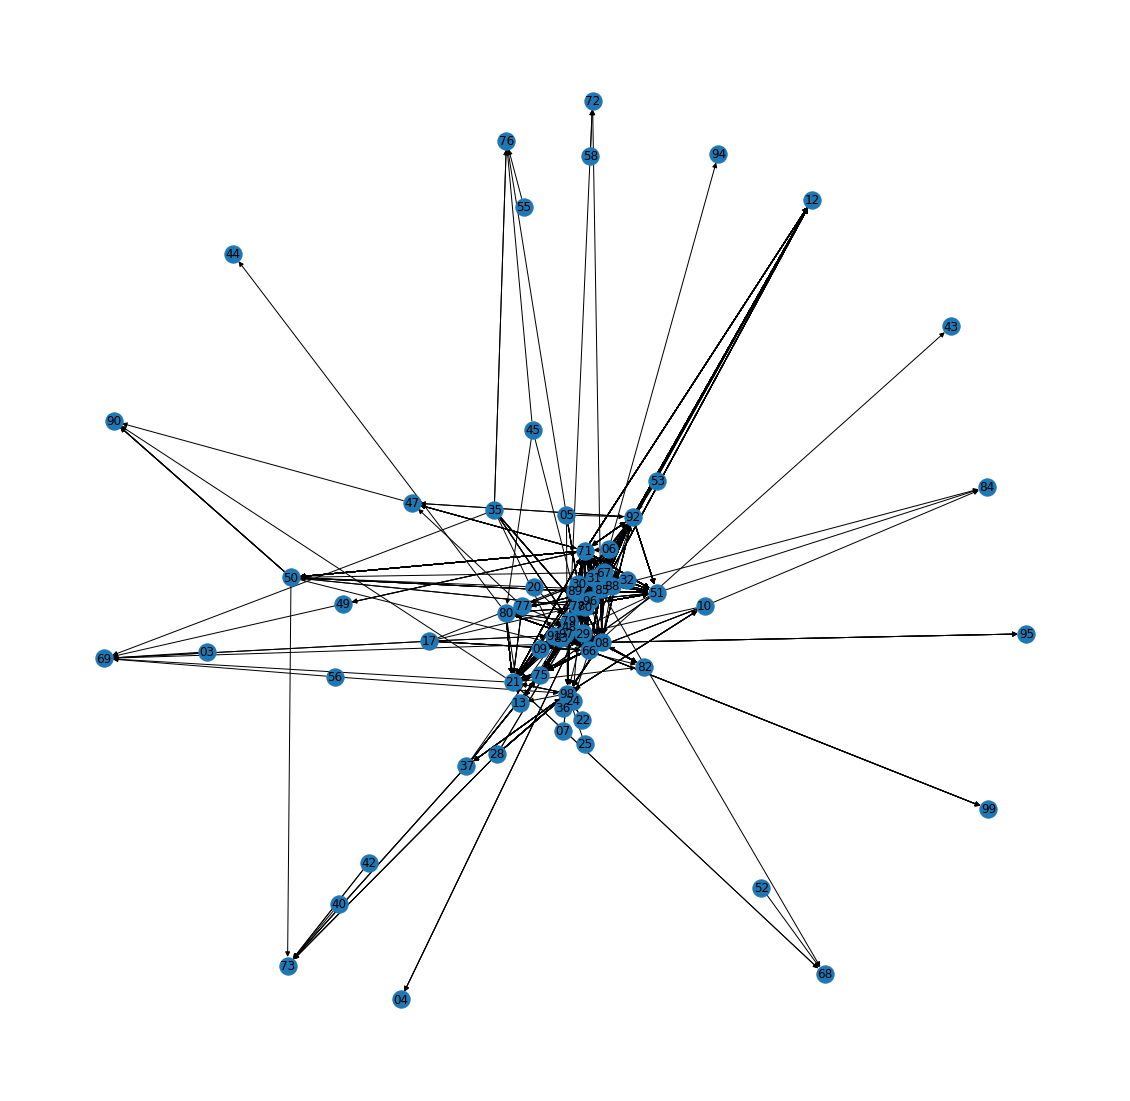

In [32]:
#drawing a pig movement network between counties
plt.figure(figsize=(20,20))
nx.draw_networkx(county_network_multi, with_labels=True)
plt.axis('off')

(-1.0229536256698712,
 0.724567917713639,
 -0.7042608848073538,
 1.161943341995269)

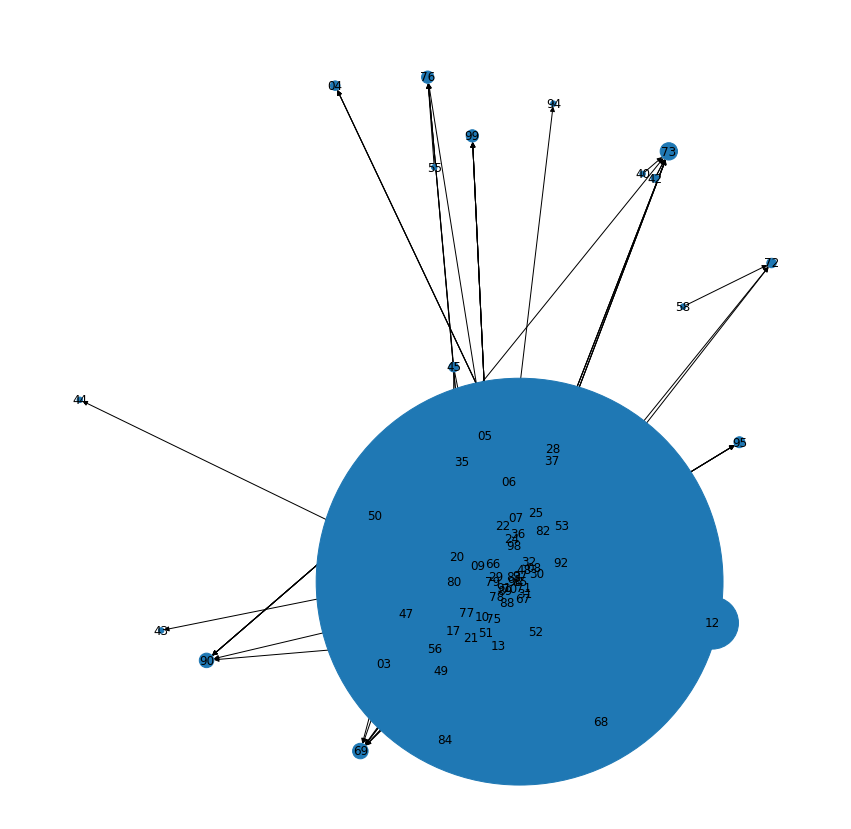

In [33]:
#drawing a pig movement network between counties
#plt.figure(figsize=(20,20))
#nx.draw_networkx(county_network_multi, with_labels=True)
#plt.axis('off')
pos = nx.spring_layout(county_network_multi)
#betCent = nx.betweenness_centrality(county_network_multi, normalized=True, endpoints=True)
#node_color = [20000.0 * county_network_multi.degree(v) for v in county_network_multi]
node_size =  [30 * county_network_multi.degree(v) for v in county_network_multi]
plt.figure(figsize=(15,15))
nx.draw_networkx(county_network_multi, pos=pos, with_labels=True,
                 node_size=node_size )
plt.axis('off')

In [94]:
#incoming movement to a county, allowing multi-directional connection between counties
sorted(county_network_multi.in_degree, key=lambda x: x[1], reverse=True)

[('48', 1619),
 ('85', 1454),
 ('67', 1362),
 ('66', 1166),
 ('71', 691),
 ('97', 622),
 ('31', 609),
 ('92', 432),
 ('70', 431),
 ('21', 329),
 ('51', 244),
 ('89', 204),
 ('98', 195),
 ('75', 149),
 ('08', 99),
 ('78', 96),
 ('12', 91),
 ('50', 32),
 ('88', 28),
 ('91', 28),
 ('13', 25),
 ('83', 24),
 ('32', 17),
 ('80', 12),
 ('82', 12),
 ('24', 10),
 ('73', 10),
 ('37', 8),
 ('69', 8),
 ('90', 7),
 ('47', 6),
 ('10', 5),
 ('99', 5),
 ('76', 5),
 ('95', 4),
 ('77', 4),
 ('68', 4),
 ('84', 3),
 ('79', 3),
 ('04', 3),
 ('72', 3),
 ('96', 2),
 ('49', 2),
 ('44', 1),
 ('43', 1),
 ('30', 1),
 ('94', 1),
 ('06', 0),
 ('36', 0),
 ('28', 0),
 ('29', 0),
 ('17', 0),
 ('35', 0),
 ('20', 0),
 ('07', 0),
 ('45', 0),
 ('05', 0),
 ('03', 0),
 ('09', 0),
 ('42', 0),
 ('56', 0),
 ('40', 0),
 ('52', 0),
 ('58', 0),
 ('22', 0),
 ('55', 0),
 ('25', 0),
 ('53', 0)]

In [95]:
#outgoing movement from a county, allowing multi-directional connection between counties
sorted(county_network_multi.out_degree, key=lambda x: x[1], reverse=True)

[('85', 4063),
 ('70', 1178),
 ('71', 788),
 ('66', 651),
 ('97', 636),
 ('92', 474),
 ('89', 416),
 ('31', 374),
 ('67', 273),
 ('96', 228),
 ('78', 201),
 ('08', 190),
 ('48', 117),
 ('80', 56),
 ('83', 44),
 ('88', 40),
 ('29', 39),
 ('28', 29),
 ('24', 26),
 ('98', 25),
 ('91', 25),
 ('79', 25),
 ('37', 17),
 ('06', 17),
 ('35', 16),
 ('21', 12),
 ('51', 12),
 ('36', 11),
 ('17', 11),
 ('05', 9),
 ('50', 8),
 ('10', 6),
 ('77', 6),
 ('75', 5),
 ('32', 4),
 ('47', 4),
 ('30', 4),
 ('45', 3),
 ('22', 3),
 ('13', 2),
 ('49', 2),
 ('07', 2),
 ('09', 2),
 ('42', 2),
 ('56', 2),
 ('20', 1),
 ('82', 1),
 ('03', 1),
 ('40', 1),
 ('52', 1),
 ('58', 1),
 ('55', 1),
 ('25', 1),
 ('53', 1),
 ('84', 0),
 ('95', 0),
 ('12', 0),
 ('90', 0),
 ('44', 0),
 ('73', 0),
 ('04', 0),
 ('99', 0),
 ('69', 0),
 ('76', 0),
 ('43', 0),
 ('94', 0),
 ('68', 0),
 ('72', 0)]

In [96]:
#pig movement network between counties(directional)
county_network = nx.from_pandas_edgelist(pig_movements_cph_extended, source='dep_county', target='dest_county', edge_attr=True, create_using=nx.DiGraph)

In [97]:
#incoming movement to a county
sorted(county_network.in_degree, key=lambda x: x[1], reverse=True)

[('71', 16),
 ('48', 16),
 ('66', 15),
 ('67', 15),
 ('21', 13),
 ('92', 13),
 ('98', 13),
 ('97', 12),
 ('78', 10),
 ('75', 9),
 ('83', 9),
 ('89', 8),
 ('31', 8),
 ('51', 8),
 ('70', 7),
 ('08', 7),
 ('91', 7),
 ('69', 7),
 ('85', 5),
 ('50', 5),
 ('13', 5),
 ('73', 5),
 ('80', 4),
 ('12', 4),
 ('32', 4),
 ('82', 4),
 ('76', 4),
 ('88', 3),
 ('84', 3),
 ('24', 3),
 ('90', 3),
 ('79', 3),
 ('47', 3),
 ('68', 3),
 ('72', 3),
 ('96', 2),
 ('77', 2),
 ('37', 1),
 ('10', 1),
 ('95', 1),
 ('44', 1),
 ('49', 1),
 ('04', 1),
 ('99', 1),
 ('43', 1),
 ('30', 1),
 ('94', 1),
 ('06', 0),
 ('36', 0),
 ('28', 0),
 ('29', 0),
 ('17', 0),
 ('35', 0),
 ('20', 0),
 ('07', 0),
 ('45', 0),
 ('05', 0),
 ('03', 0),
 ('09', 0),
 ('42', 0),
 ('56', 0),
 ('40', 0),
 ('52', 0),
 ('58', 0),
 ('22', 0),
 ('55', 0),
 ('25', 0),
 ('53', 0)]

In [98]:
#outgoing movement from a county
sorted(county_network.out_degree, key=lambda x: x[1], reverse=True)

[('85', 22),
 ('71', 17),
 ('67', 15),
 ('08', 15),
 ('89', 14),
 ('66', 13),
 ('92', 13),
 ('70', 13),
 ('78', 10),
 ('31', 9),
 ('21', 8),
 ('48', 8),
 ('51', 6),
 ('97', 5),
 ('98', 5),
 ('80', 5),
 ('88', 5),
 ('06', 5),
 ('17', 5),
 ('35', 5),
 ('37', 4),
 ('10', 4),
 ('28', 4),
 ('50', 4),
 ('29', 4),
 ('77', 4),
 ('91', 4),
 ('05', 4),
 ('96', 3),
 ('79', 3),
 ('83', 3),
 ('45', 3),
 ('30', 3),
 ('75', 2),
 ('49', 2),
 ('47', 2),
 ('09', 2),
 ('56', 2),
 ('24', 1),
 ('36', 1),
 ('32', 1),
 ('13', 1),
 ('20', 1),
 ('82', 1),
 ('07', 1),
 ('03', 1),
 ('42', 1),
 ('40', 1),
 ('52', 1),
 ('58', 1),
 ('22', 1),
 ('55', 1),
 ('25', 1),
 ('53', 1),
 ('84', 0),
 ('95', 0),
 ('12', 0),
 ('90', 0),
 ('44', 0),
 ('73', 0),
 ('04', 0),
 ('99', 0),
 ('69', 0),
 ('76', 0),
 ('43', 0),
 ('94', 0),
 ('68', 0),
 ('72', 0)]

In [99]:
#pig movement network between farms (directional)
farm_network = nx.from_pandas_edgelist(pig_movements_cph_extended, source='dep_business', target='dest_business',  create_using=nx.DiGraph)

In [63]:
nx.write_gexf(farm_network, "scottish_farm_network_multiDi.gexf")

(-1.1937837001681326,
 1.2084590193629263,
 -1.2052109465003014,
 1.1952544078230858)

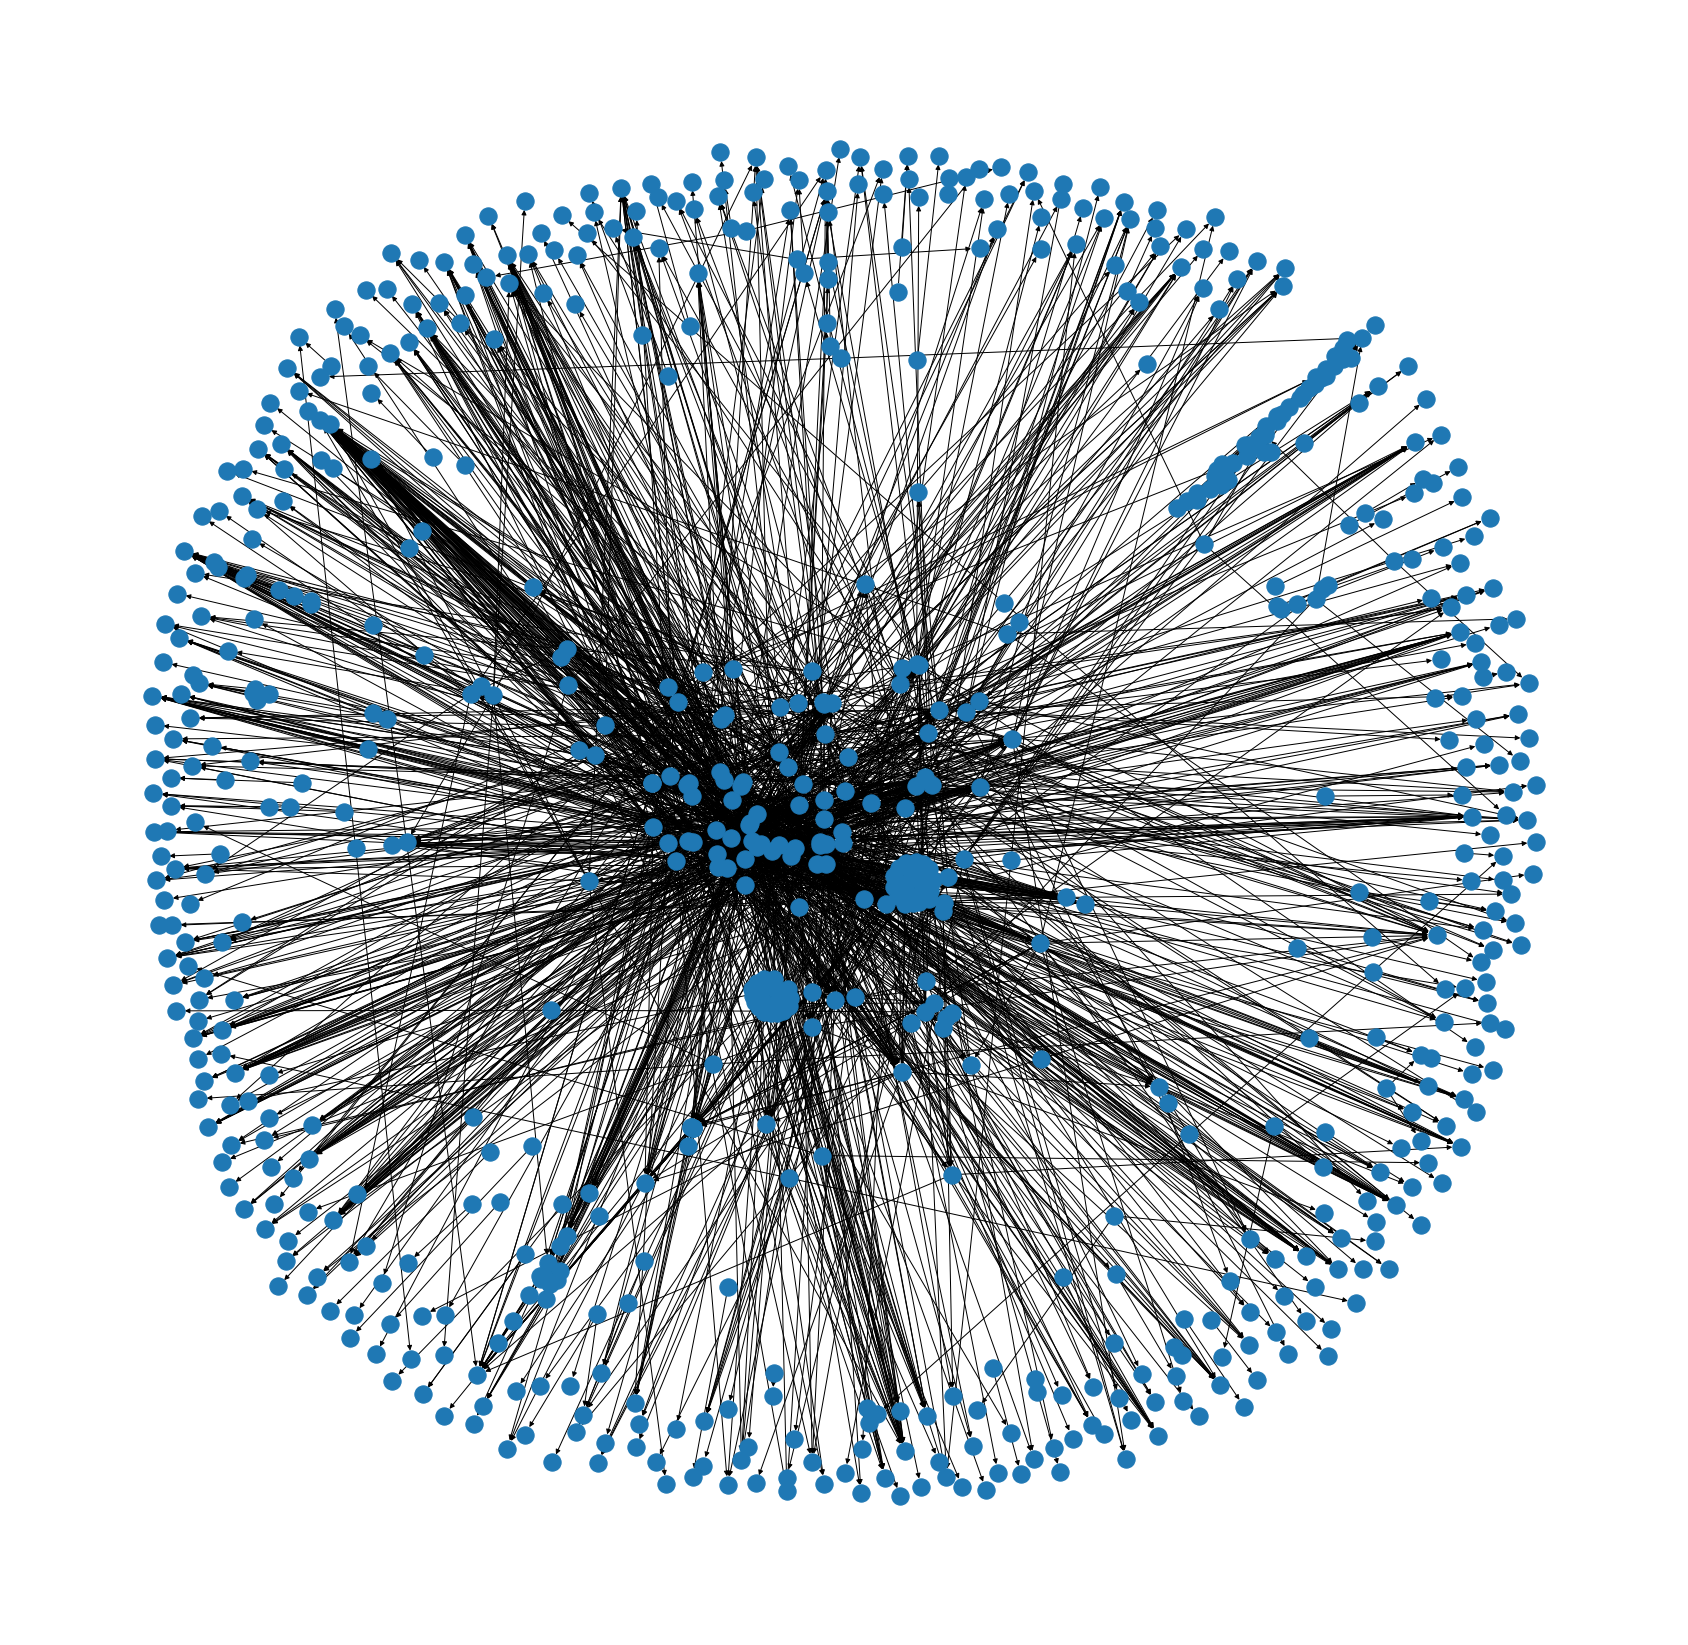

In [40]:
plt.figure(figsize=(30,30))
nx.spring_layout(farm_network)
nx.draw_networkx(farm_network, with_labels=False)
plt.axis('off')
#pos = nx.spring_layout(farm_network)
#betCent = nx.betweenness_centrality(farm_network, normalized=True, endpoints=True)
#node_color = [2000.0 * farm_network.degree(v) for v in farm_network]
#node_size =  [v * 10000 for v in betCent.values()]
#plt.figure(figsize=(20,20))
#x.draw_networkx(farm_network, pos=pos, with_labels=True,node_color=node_color,node_size=node_size )
#plt.axis('off')

In [41]:
#incoming movement to a farm
sorted(farm_network.in_degree, key=lambda x: x[1], reverse=True)

[('The Ranch', 42),
 ('The Abattoir', 37),
 ('Drumavon', 35),
 ('Brechin Abattoir', 34),
 ('Forfar', 31),
 ('Thainstone - ANM', 22),
 ('Hugden Way', 22),
 ('Floors Farm', 22),
 ('P&O Freight Terminal', 21),
 ('Meikle Bogs', 21),
 ('Caverton Mill (K)', 20),
 ('Tillynaught', 20),
 ('Whitton Farm (IM) - 07836 318883', 19),
 ('Lurden Law (IM) - 07970 696870', 19),
 ('Newton of Darnaway', 19),
 ('Thornton Park Farm', 19),
 ('Auchenhalrig Farm', 19),
 ('Easter Jordanstone', 18),
 ('Peelrig Farm', 18),
 ('Moss Hall Farm (Bell)', 18),
 ('East Holburn Farm (Bell 2)', 18),
 ('Cairncross Farm  (IM) - 07545 985470', 17),
 ('Kinnell Mill (Batchelors)', 16),
 ('Green End Farm (IM) - 07774 469471', 15),
 ('Ewart Farm', 15),
 ('Sherrifston Farm', 14),
 ('Sweethillock', 14),
 ('Maidenhall Farm (IM) - 07774 289813', 14),
 ('Holefield Farm (IM) - 07989 176183', 14),
 ('Woodheads Farm (IM) - 07754 503799', 14),
 ('Forfar Mart', 14),
 ('Burnhead Farm (K)', 13),
 ('South Slipperfield', 13),
 ('Spittal on Ru

In [42]:
#outgoing movement from a farm
sorted(farm_network.out_degree, key=lambda x: x[1], reverse=True)

[('Longmorn Farm', 64),
 ('Balormie', 64),
 ('Clackmarras', 60),
 ('Sanquhar Mains', 58),
 ('Westerfolds Farm', 58),
 ('Lower Rafford (Marcassie)', 57),
 ('Cloddach Farm', 56),
 ('Viewfield', 53),
 ('Coxton (Easter Coxton)', 52),
 ('Longhill Farm', 50),
 ('Rashcrook', 46),
 ('South Balloch', 40),
 ('Dykeside', 38),
 ('Standing Stones', 38),
 ('Scarffbanks Farm', 36),
 ('Boysack Farm', 35),
 ('Caysbriggs', 32),
 ('Cowfords Farm', 31),
 ('Learig', 31),
 ('Peelrig Farm', 31),
 ('Green Wood Farm', 29),
 ('Cocklaw Farm', 26),
 ('Vicarsford', 24),
 ('Nether Bogside', 23),
 ('Stonewells', 22),
 ('Broom Farm', 20),
 ('Kinalty Haugh Farm', 20),
 ('Kelso', 20),
 ('Morebattle', 19),
 ('Newton of Glamis', 18),
 ('Hatton Farm', 17),
 ('Holefield Farm', 16),
 ('Burnhead Farm (K)', 15),
 ('Meikle Bogs', 14),
 ('Denholm', 14),
 ('Burgie', 13),
 ('Northumberland', 13),
 ('Lower Auchenreath', 13),
 ('Woodheads Farm', 12),
 ('Reston Hill Farm', 12),
 ('Cairncross Farm', 11),
 ('Mains of Craigmancie', 11)

In [43]:
#pig_movements_cph_extended.loc[pig_movements_cph_extended['dest_business'] == 'Cloddach Farm']
outdeg = farm_network.out_degree()
to_remove = [n for n in outdeg if outdeg[n] == 1]

KeyError: ('Clackmarras', 60)

In [100]:
#reducing postcode into area 
pig_movements_2019_2020['dep_area'] = pig_movements_2019_2020.dep_postcode.str[:2]
pig_movements_2019_2020['dest_area'] = pig_movements_2019_2020.dest_postcode.str[:2]

C:\Users\lordf\AnacondaFide\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lordf\AnacondaFide\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
#pig movement network between areas (directional)
area_network = nx.from_pandas_edgelist(pig_movements_2019_2020, source='dep_area', target='dest_area', edge_attr=True, create_using=nx.DiGraph)

In [46]:
#drawing a pig movement network between counties
#plt.figure(figsize=(20,20))
#nx.draw_networkx(area_network, with_labels=True)
#plt.axis('off')

(-1.2091612898675934,
 1.2011735743208622,
 -1.1306153378901758,
 1.179096223235944)

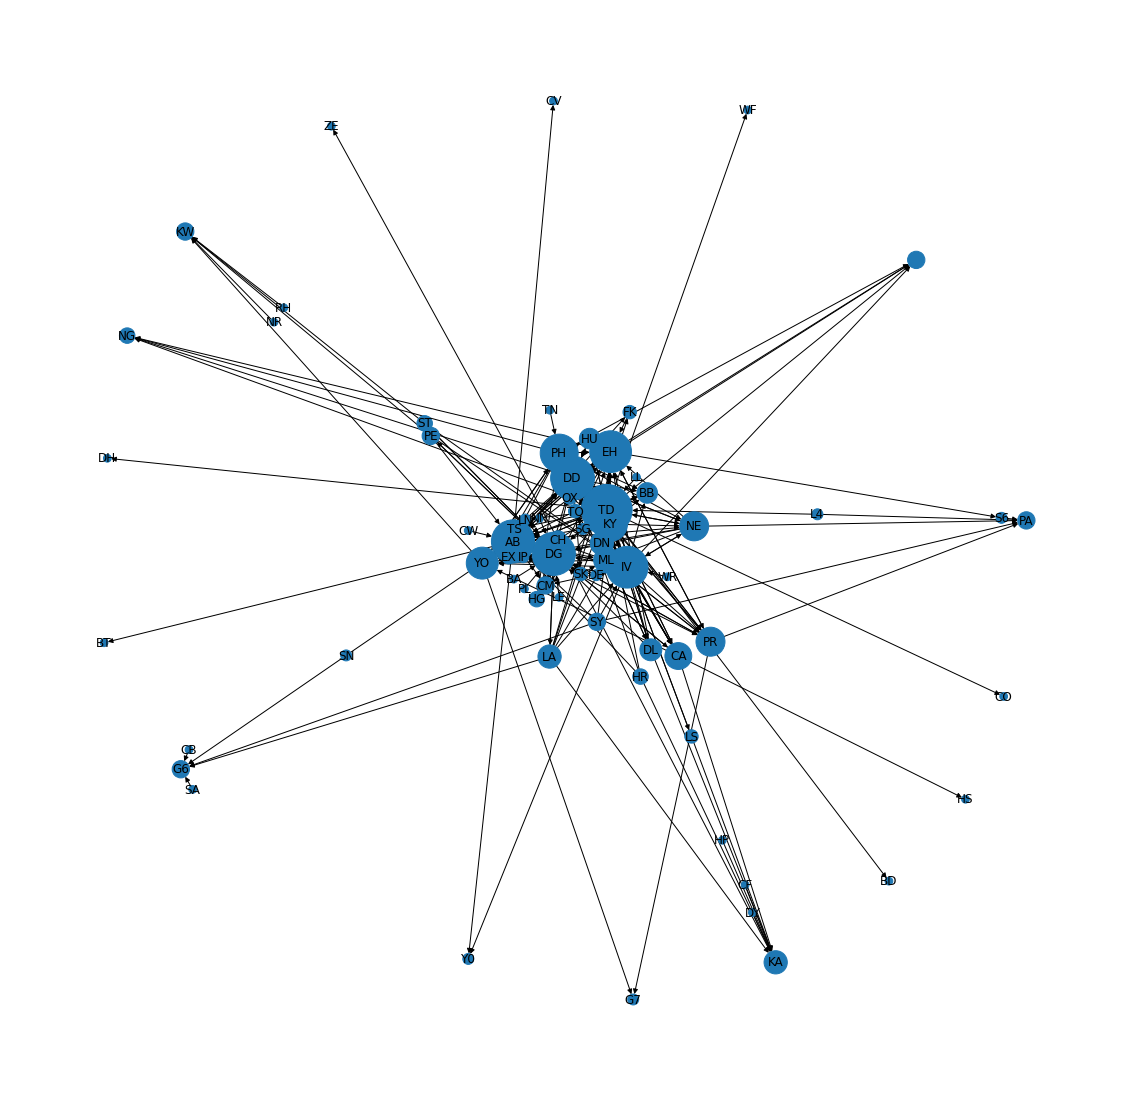

In [47]:
#drawing a pig movement network between areas
pos = nx.spring_layout(area_network)
#betCent = nx.betweenness_centrality(area_network, normalized=True, endpoints=True)
#node_color = [20000.0 * area_network.degree(v) for v in area_network]
#node_size =  [v * 10000 for v in betCent.values()]
node_size =  [60 * area_network.degree(v) for v in area_network]
plt.figure(figsize=(20,20))
nx.draw_networkx(area_network, pos=pos, with_labels=True,
                 node_size=node_size )
plt.axis('off')

(-0.9805164529193071,
 0.9785783817220624,
 -1.181430821921519,
 0.9093434116502735)

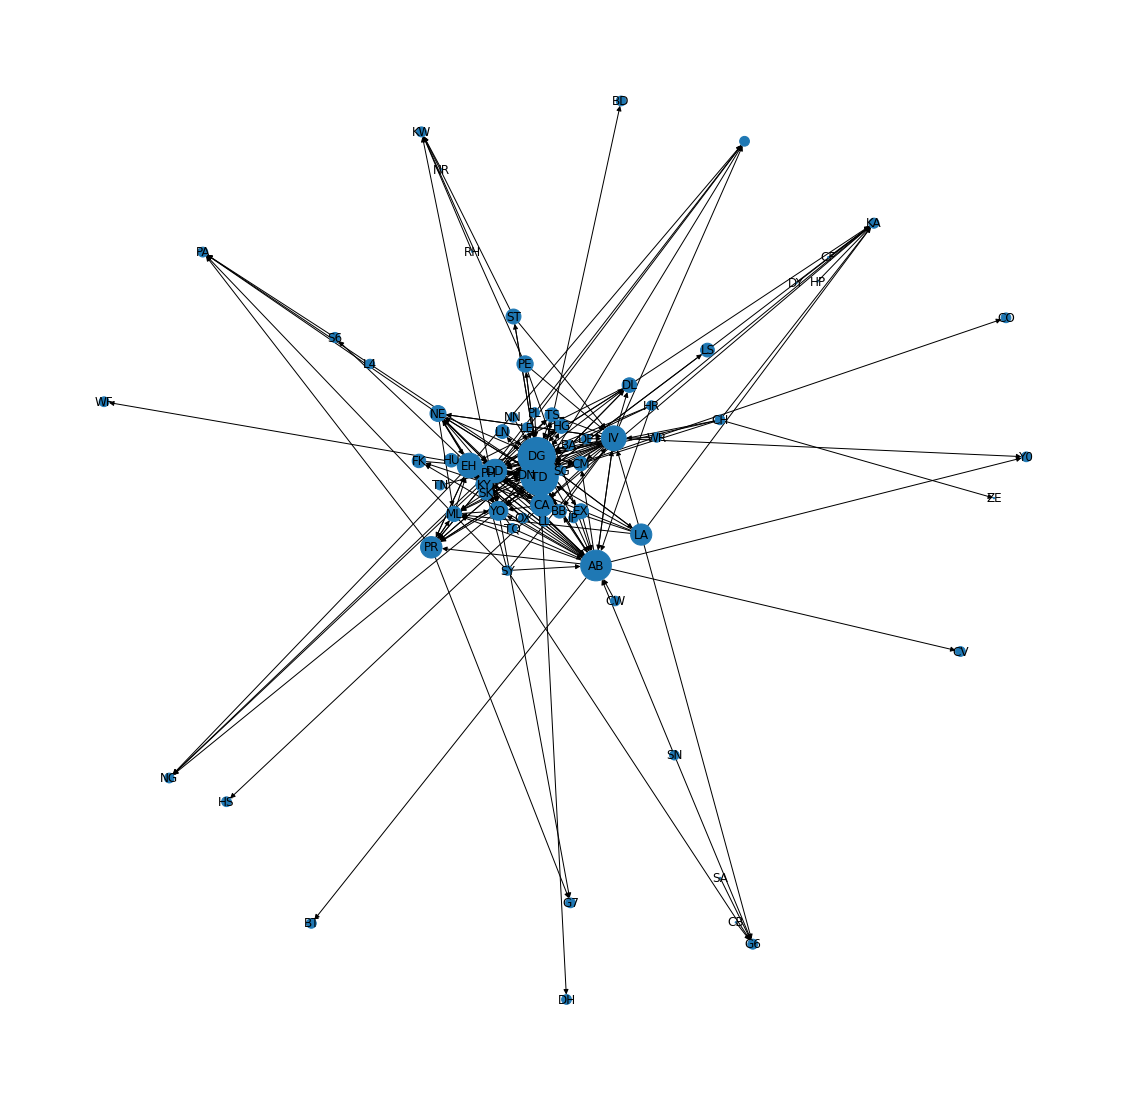

In [48]:
#drawing a pig movement network between areas
pos = nx.spring_layout(area_network)
betCent = nx.betweenness_centrality(area_network, normalized=True, endpoints=True)
#node_color = [20000.0 * area_network.degree(v) for v in area_network]
#node_size =  [v * 10000 for v in betCent.values()]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(area_network, pos=pos, with_labels=True,
                 node_size=node_size )
plt.axis('off')

In [102]:
a=nx.betweenness_centrality(area_network, normalized=True, endpoints=True)

In [103]:
b=area_network.degree()

In [104]:
a

{'IV': 0.0614757968996186,
 'AB': 0.09421280599669347,
 'TD': 0.14012070903831955,
 'BB': 0.018219461697722567,
 'EH': 0.06045311106098464,
 'YO': 0.03543936597645037,
 'PH': 0.03430125492648329,
 'DG': 0.13915494727332503,
 'DD': 0.05473478381589453,
 'Y0': 0.009523809523809523,
 'CA': 0.05202159915349539,
 'NE': 0.025594866455754293,
 'DE': 0.009109730848861283,
 'TS': 0.019655543376771,
 'PR': 0.04594064449197806,
 'KY': 0.026503197475064487,
 'HU': 0.018219461697722567,
 ' ': 0.009523809523809523,
 'CW': 0.009109730848861283,
 'TQ': 0.009109730848861283,
 'LN': 0.018909592822636302,
 'LA': 0.04481573182294775,
 'G6': 0.009937888198757764,
 'DL': 0.021178268408812803,
 'HG': 0.019655543376771,
 'PE': 0.02640062754604223,
 'BA': 0.009109730848861283,
 'IP': 0.009109730848861283,
 'DH': 0.009523809523809523,
 'G7': 0.009523809523809523,
 'NG': 0.009523809523809523,
 'EX': 0.022309184543382574,
 'CM': 0.02013808016365561,
 'OX': 0.009109730848861283,
 'SK': 0.018698166557592936,
 'HR':

In [105]:
b

DiDegreeView({'IV': 29, 'AB': 31, 'TD': 43, 'BB': 7, 'EH': 29, 'YO': 17, 'PH': 24, 'DG': 31, 'DD': 32, 'Y0': 2, 'CA': 12, 'NE': 14, 'DE': 2, 'TS': 5, 'PR': 14, 'KY': 20, 'HU': 7, ' ': 5, 'CW': 1, 'TQ': 3, 'LN': 2, 'LA': 9, 'G6': 5, 'DL': 8, 'HG': 4, 'PE': 5, 'BA': 1, 'IP': 2, 'DH': 1, 'G7': 2, 'NG': 4, 'EX': 3, 'CM': 5, 'OX': 3, 'SK': 3, 'HR': 4, 'SY': 5, 'DN': 9, 'TN': 1, 'ML': 11, 'LS': 3, 'PL': 1, 'ST': 4, 'KW': 5, 'SN': 2, 'NN': 1, 'WR': 1, 'BT': 1, 'KA': 9, 'SG': 2, 'HS': 1, 'BD': 1, 'CV': 1, 'S6': 2, 'HP': 1, 'CH': 5, 'DY': 1, 'FK': 3, 'WF': 1, 'NR': 1, 'CB': 1, 'CO': 1, 'RH': 1, 'PA': 5, 'ZE': 1, 'L4': 2, 'CF': 1, 'LE': 1, 'SA': 1, 'LL': 1})

In [106]:
Inverness_counties = pig_movements_2019_2020.loc[(pig_movements_2019_2020['dep_area'] == 'IV') & (pig_movements_2019_2020['dest_area'] == 'IV')]

In [107]:
Inverness_counties

,sams_movement_reference_pigs,foreign_reference,lot_no,lot_date,departure_date,arrival_date,qty_pigs,qty_doa,fci_declaration,dep_assurance_no,...,birth_cph,updated,dep_county,dep_perish,dep_holding,dest_county,dest_perish,dest_holding,dep_area,dest_area
376,4388062,None,71185,2019-09-23,2019-09-23,2019-09-23,50,0.0,None,686,...,None,None,96,830,0195,85,593,0068,IV,IV
645,4460032,None,71527,2019-10-21,2019-10-21,2019-10-21,50,0.0,None,686,...,None,None,96,830,0195,85,593,0068,IV,IV
706,4115419,None,68461,2019-01-23,2019-01-23,2019-01-23,7,0.0,None,204 / 2815.0035P.1,...,None,None,85,602,0026,85,600,0002,IV,IV
731,4104795,None,68382,2019-01-17,2019-01-17,2019-01-17,296,0.0,None,267,...,None,None,85,587,0027,85,590,0014,IV,IV
1536,4246390,None,69919,2019-05-20,2019-05-20,2019-05-20,30,0.0,None,None,...,None,None,85,593,0068,85,590,0009,IV,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135316,5082337,None,76351,2021-01-20,2021-01-20,2021-01-20,21,0.0,None,None,...,,None,85,602,0026,85,600,0002,IV,IV
135362,5102469,None,76511,2021-02-04,2021-02-04,NaT,1030,NaN,None,None,...,,None,85,588,0065,85,599,0031,IV,IV
135386,5082338,None,76352,2021-01-20,2021-01-20,2021-01-20,23,0.0,None,None,...,,None,85,602,0026,85,600,0002,IV,IV
135428,5082339,None,76353,2021-01-21,2021-01-21,2021-01-21,1166,0.0,None,None,...,,None,85,595,0011,85,593,0066,IV,IV


In [108]:
#pig movement network between counties(directional), allowing multiple connections between two counties
Inverness_counties_network = nx.from_pandas_edgelist(Inverness_counties, source='dep_county', target='dest_county', edge_attr=True, create_using=nx.MultiDiGraph)

(-0.8037322876179093,
 1.171395375746498,
 -0.1290902781519593,
 0.13336330012981107)

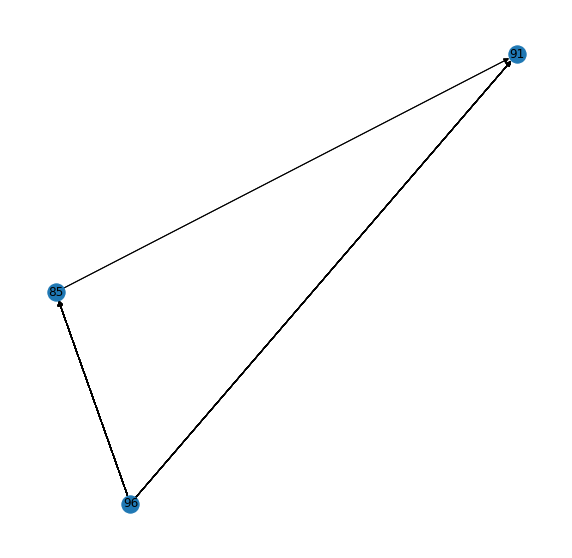

In [55]:
#drawing a pig movement network between counties
plt.figure(figsize=(10,10))
nx.draw_networkx(Inverness_counties_network, with_labels=True)
plt.axis('off')

(-0.44045674945905894,
 0.4958870699094201,
 -0.7431780537129323,
 1.1656413535202335)

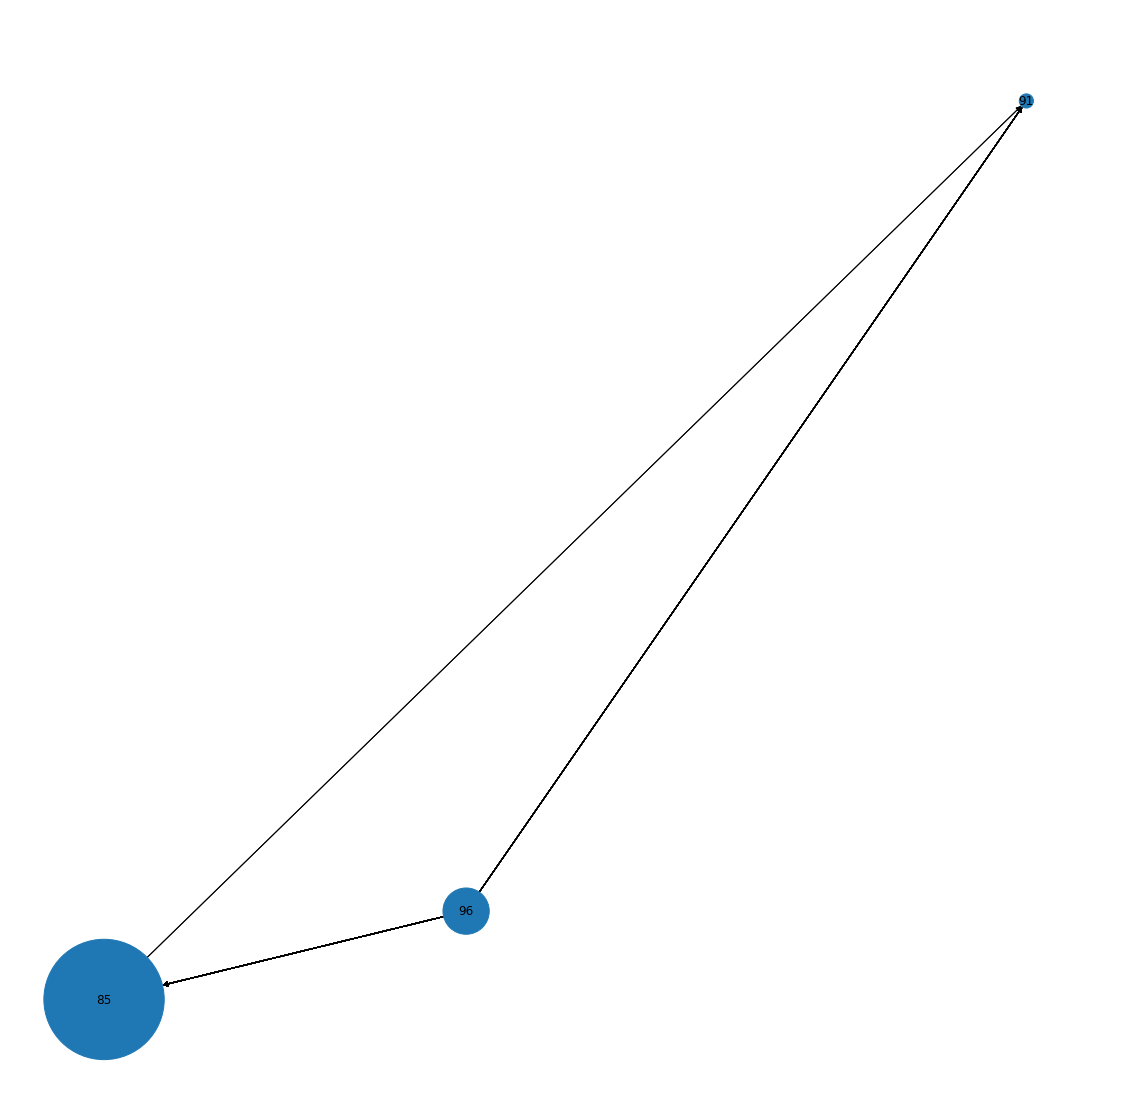

In [56]:
pos = nx.spring_layout(Inverness_counties_network)
#betCent = nx.betweenness_centrality(Inverness_counties_network, normalized=True, endpoints=True)
#node_color = [20000.0 * area_network.degree(v) for v in area_network]
#node_size =  [v * 10000 for v in betCent.values()]
node_size =  [10 * Inverness_counties_network.degree(v) for v in Inverness_counties_network]
plt.figure(figsize=(20,20))
nx.draw_networkx(Inverness_counties_network, pos=pos, with_labels=True,
                 node_size=node_size )
plt.axis('off')

In [109]:
#pig movement network between farms (directional)
farm_network_inverness = nx.from_pandas_edgelist(Inverness_counties_85, source='dep_business', target='dest_business', create_using=nx.MultiDiGraph)

In [110]:
Inverness_counties_85 = Inverness_counties.loc[(Inverness_counties['dep_county'] == '85') & (Inverness_counties['dest_county'] == '85')]

In [111]:
Inverness_counties_85

,sams_movement_reference_pigs,foreign_reference,lot_no,lot_date,departure_date,arrival_date,qty_pigs,qty_doa,fci_declaration,dep_assurance_no,...,birth_cph,updated,dep_county,dep_perish,dep_holding,dest_county,dest_perish,dest_holding,dep_area,dest_area
706,4115419,None,68461,2019-01-23,2019-01-23,2019-01-23,7,0.0,None,204 / 2815.0035P.1,...,None,None,85,602,0026,85,600,0002,IV,IV
731,4104795,None,68382,2019-01-17,2019-01-17,2019-01-17,296,0.0,None,267,...,None,None,85,587,0027,85,590,0014,IV,IV
1536,4246390,None,69919,2019-05-20,2019-05-20,2019-05-20,30,0.0,None,None,...,None,None,85,593,0068,85,590,0009,IV,IV
1666,4623188,None,72895,2020-02-19,2020-02-19,2020-02-19,11,0.0,None,204 / 2815.0035P.1,...,,None,85,602,0026,85,602,0009,IV,IV
1727,4623190,None,72897,2020-02-19,2020-02-19,2020-02-19,7,0.0,None,204 / 2815.0035P.1,...,,None,85,602,0026,85,600,0002,IV,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135225,5072664,None,76255,2021-01-11,2021-01-11,2021-01-11,20,0.0,None,204 / 2815.0035P.1,...,,None,85,602,0026,85,587,0027,IV,IV
135316,5082337,None,76351,2021-01-20,2021-01-20,2021-01-20,21,0.0,None,None,...,,None,85,602,0026,85,600,0002,IV,IV
135362,5102469,None,76511,2021-02-04,2021-02-04,NaT,1030,NaN,None,None,...,,None,85,588,0065,85,599,0031,IV,IV
135386,5082338,None,76352,2021-01-20,2021-01-20,2021-01-20,23,0.0,None,None,...,,None,85,602,0026,85,600,0002,IV,IV


(-1.1921194261865706,
 1.0218282470110527,
 -0.8974590946871341,
 1.029080621069791)

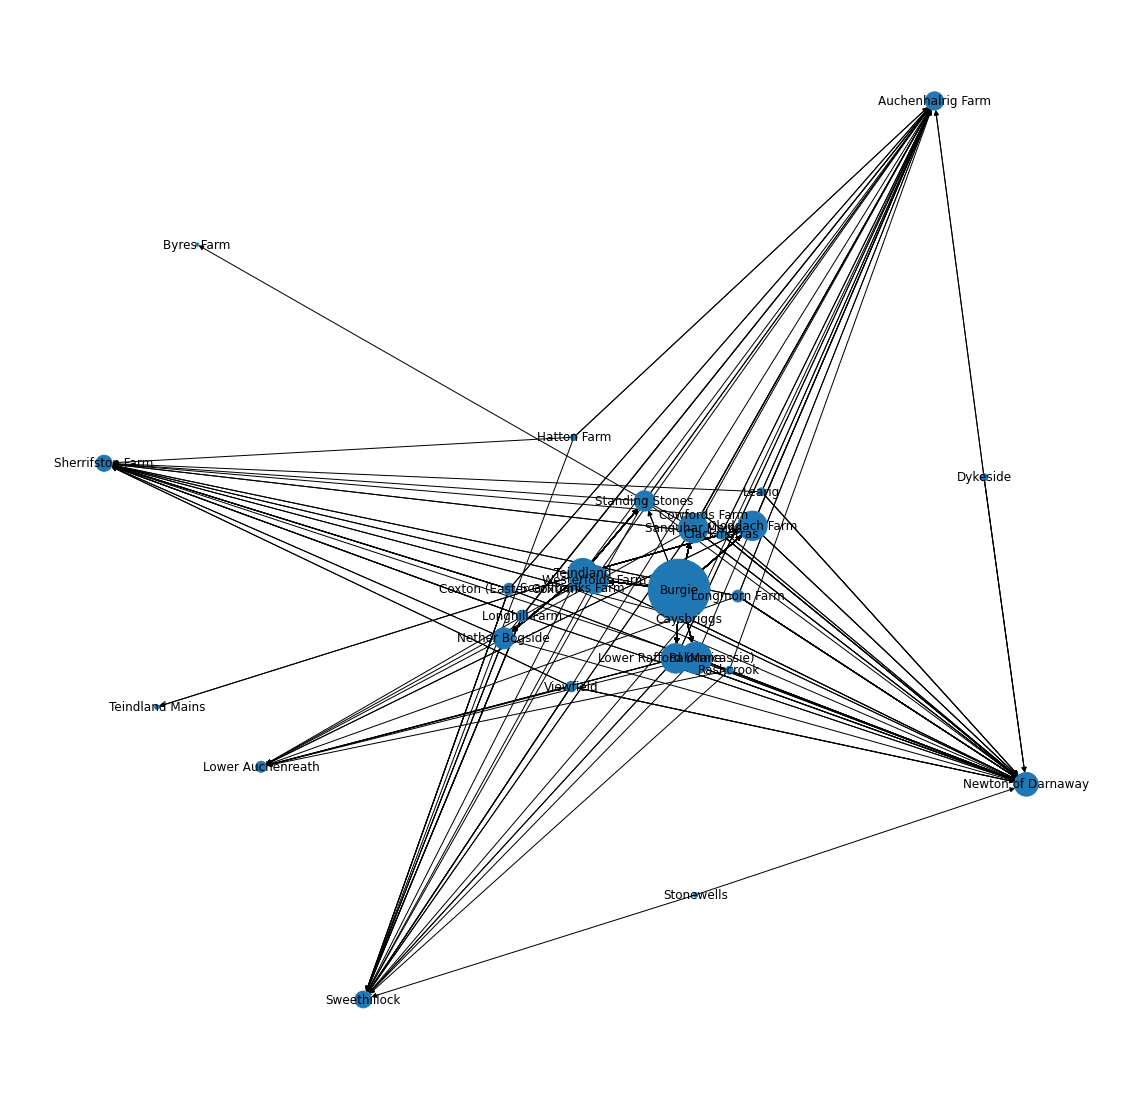

In [57]:
pos = nx.spring_layout(farm_network_inverness)
#betCent = nx.betweenness_centrality(Inverness_counties_network, normalized=True, endpoints=True)
#node_color = [20000.0 * area_network.degree(v) for v in area_network]
#node_size =  [v * 10000 for v in betCent.values()]
node_size =  [10 * farm_network_inverness.degree(v) for v in farm_network_inverness]
plt.figure(figsize=(20,20))
nx.draw_networkx(farm_network_inverness, pos=pos, with_labels=True,
                 node_size=node_size )
plt.axis('off')

In [59]:
print(nx.number_strongly_connected_components(Inverness_counties_network))

NameError: name 'Inverness_counties_network' is not defined

In [ ]:
len(Inverness_counties_network)

In [114]:
farm_network_inverness_Di = nx.from_pandas_edgelist(Inverness_counties_85, source='dep_business', target='dest_business', create_using=nx.DiGraph)

In [116]:
nx.write_gexf(farm_network_inverness_Di, "farm_network_inverness_Di.gexf")

In [ ]:
#nx.write_gexf(farm_network, "farm.gexf")
help(nx.write_gexf)


In [ ]:
pig_movements.info()

In [ ]:
#drawing the farms nework
#nx.draw_networkx(business_network, with_labels=False)

In [ ]:
#print(nx.info(business_network))

In [ ]:
#nx.in_degree_centrality(business_network)

In [ ]:
#nx.out_degree_centrality(business_network)

In [ ]:
#sorted(business_network.in_degree, key=lambda x: x[1], reverse=True)

In [ ]:
#sorted(business_network.out_degree, key=lambda x: x[1], reverse=True)

In [ ]:
#nx.betweenness_centrality(cph_network)

In [ ]:
#orted(business_network.betweenness_centrality, key=lambda x: x[1], reverse=True)

In [ ]:
#pig_movements['departure_county'] = pig_movements['departure_cph'].str[:2]

In [ ]:
#pig_movements['destination_county'] = pig_movements['destination_cph'].str[:2]

In [ ]:
#County_network = nx.from_pandas_edgelist(pig_movements, source='departure_county', target='destination_county', edge_attr=True,create_using=nx.DiGraph)

In [ ]:
#County_network.nodes()

In [ ]:
#County_network.edges()

In [ ]:
#cph_network = nx.from_pandas_edgelist(pig_movements, source='dep_business', target='dest_business', edge_attr=True)

In [ ]:
#print(nx.info(cph_network))

In [ ]:
#nx.degree_centrality(cph_network)

In [ ]:
#sorted(cph_network.degree, key=lambda x: x[1], reverse=True)